# Physical AI Spatial Intelligence Warehouse 
For details go to [here](https://huggingface.co/datasets/nvidia/PhysicalAI-Spatial-Intelligence-Warehouse)
### Information
The Physical AI Spatial Intelligence Warehouse is a comprehensive synthetic dataset designed to advance 3D scene understanding in warehouse environments. Generated using ***NVIDIA's Omniverse***, this dataset focuses on ***spatial reasoning through natural language question-answering pairs*** that cover four key categories:
* ***left_right***: understand the spatial relationship between different objects / regions
* ***multi_choice_question(mcq)***: identify the index of target from multiple candidate objects / regions
* ***distance***: estimate the distance (in meters) between different objects / regions
* ***count***: ask about the number of certain type of objects that satisifies the condition (leftmost, specific categories)

Each data point includes:
* RGB-D images
* Object masks
* Natural language Q&A pairs with normalized single-word answers.

The ***annotations*** are automatically generated using ***rule-based templates*** and ***refined using LLMs (Llama-3.1-70B-Instruct)*** for more natural language responses.

### Dataset Qualification: 
* **Training set**: 499k QA pairs
* **Test set**: 19k QA pairs
* **Validation set**: 1.9k QA pairs.
* **Image pair**: 95k RGB-D image pairs in total.

### Annotation Format
Following [LLaVa](https://arxiv.org/abs/2304.08485) format for VLM training. In ***train.json***, and ***val.json***, each sample have:
* ***id***: identity
* ***iamge***: image name
* ***conversations***: chat between human and gpt
* ***rle***:  corresponding masks per object in order following pycoco format
* ***category***: question category
* ***normalized_answer***: for evaluate and submit in single-word answer
* ***freeform_answer***: original answer from 'gpt'

In ***test.json*** only contains: ***id, image, conversations***


In [1]:
!pwd

/Users/dangminh/Desktop/aicity2025_track3_warehouse_spatial_intelligence/notebooks


id: aff5479b81c95b0194f58dbaaa041332
image: 000315.png
conversations:
[{'from': 'human', 'value': 'From this viewpoint, does the pallet <mask> appear on the right-hand side of the pallet <mask>?'}, {'from': 'gpt', 'value': 'The pallet [Region 0] is to the left of the pallet [Region 1].'}]
rle: 2 of masks
category: left_right
normalized_answer: left
freeform_answer: The pallet [Region 0] is to the left of the pallet [Region 1].


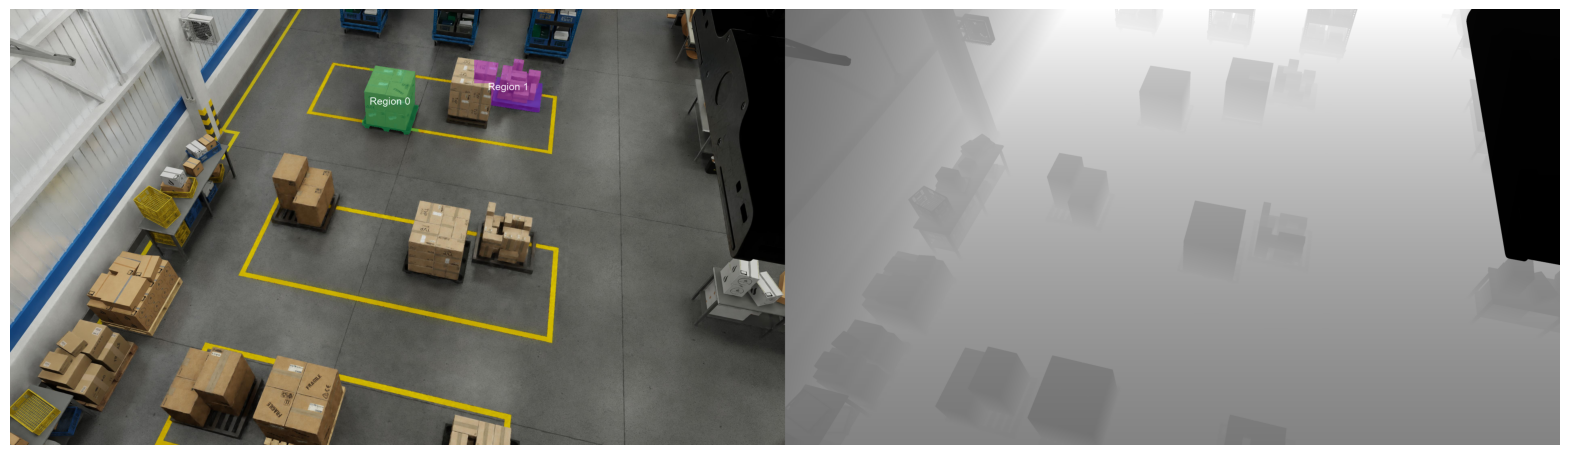

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import json

# load val dataset
with open("../data/PhysicalAI-Spatial-Intelligence-Warehouse/val.json", "r") as f:
        data = json.load(f)

# take the first sample, then visualize
sample = data[0]
print("="*100)
print(f"id: {sample['id']}")
print(f"image: {sample['image']}")
print(f"conversations:\n{sample['conversations']}")
print(f"rle: {len(sample['rle'])} of masks")
print(f"category: {sample['category']}")
print(f"normalized_answer: {sample['normalized_answer']}")
print(f"freeform_answer: {sample['freeform_answer']}")


image_path = f"../data/PhysicalAI-Spatial-Intelligence-Warehouse/visualization/val.json_{sample['image']}"
image = Image.open(image_path)
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.axis('off')
plt.show()
print("="*100)